In [131]:
import numpy as np
import scipy as sp
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
class OrbTracker(object):

    """ Used to find and return the matched keypoints of given images. """

    def __init__(self):
        self.matches = None     # type: list of cv2.DMath
        self.kp1 = None         # type: list of cv2.KeyPoint items
        self.des1 = None        # type: numpy.ndarray of numpy.uint8 values.
        self.kp2 = None         # type: list of cv2.KeyPoint items.
        self.des2 = None        # type: numpy.ndarray of numpy.uint8 values.

        self.orb = cv2.orb = cv2.ORB_create(nfeatures=10000, scaleFactor=1.2, WTA_K=2, scoreType=cv2.ORB_HARRIS_SCORE,\
                                            patchSize=31, nlevels=8)

        self.kp2_calculated = False  # no need to calculate same again
        self.bruteforce = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    def find_matches_between(self, image_1, image_2):
        """ Return the list of matches between two input images.

        This function detects and computes ORB features from the
        input images, and returns the best matches using the normalized Hamming
        Distance.

        Params:
            image_1 : The first image (grayscale).
            image_2 : The second image. (grayscale).

        Returns:
            image_1_kp : The image_1 keypoints.
            image_2_kp : The image_2 keypoints.
            matches : A list of matches. Each item in the list is of type cv2.DMatch.
        """
        self.kp1, self.des1 = self.orb.detectAndCompute(image_1, None)
        if not self.kp2_calculated:
            self.kp2, self.des2 = self.orb.detectAndCompute(image_2, None)
            self.kp2_calculated = True

        self.matches = self.bruteforce.match(self.des1, self.des2)
        self.matches = sorted(self.matches, key=lambda x: x.distance)
        return self.kp1,self.kp2,self.matches
    def discard_miss_match(self, threshold):
        """ Filters the matches by distance attribute of the matches.

        Params:
            threshold - float: Threshold for match.distance.
        """
        print(len(self.matches))
        self.matches = [m for m in self.matches if m.distance > threshold]
        return self.matches

    def discard_size_thresh(self):
        """ Filters the matches by the size of the keypoints.

        Note: queryIdx is current image, trainIdx is previous image.
        """
        self.matches = [m
                        for m in self.matches
                        if self.kp1[m.queryIdx].size > self.kp2[m.trainIdx].size
                        ]
        
        return self.matches


        

In [133]:
orb=OrbTracker()

In [134]:
img1=mpimg.imread('far_away.jpg')
gray1= cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

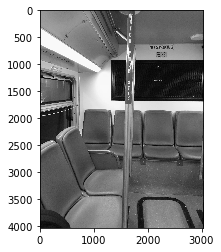

In [135]:
plt.imshow(gray1,cmap='gray')

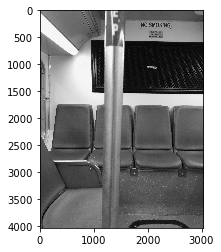

In [136]:
img2=mpimg.imread('closer.jpg')
gray2= cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(gray2,cmap='gray')

In [137]:
kp1,kp2,matches=orb.find_matches_between(gray2,gray1)
matches_discarded_by_dist=orb.discard_miss_match(25) # Threshold
final_matches=orb.discard_size_thresh()

5025


In [138]:
print(len(matches))
print(len(matches_discarded_by_dist))
print(len(final_matches))

5025
4643
3104


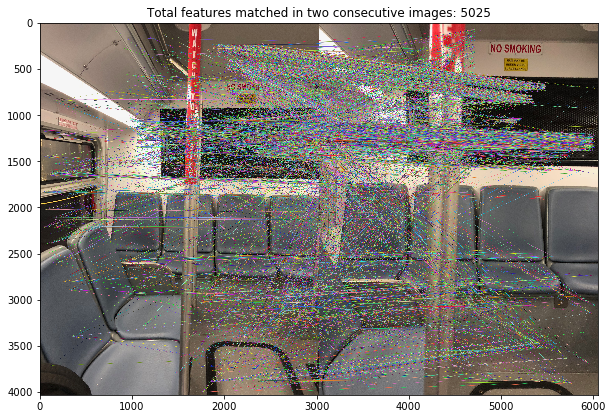

In [149]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches, None,flags=2)
plt.figure(figsize=(10,10))
plt.imshow(img3)
plt.title('Total features matched in two consecutive images: '+str(len(matches)))
plt.savefig('obr_feature_matching.jpg',dpi=200)
plt.show()

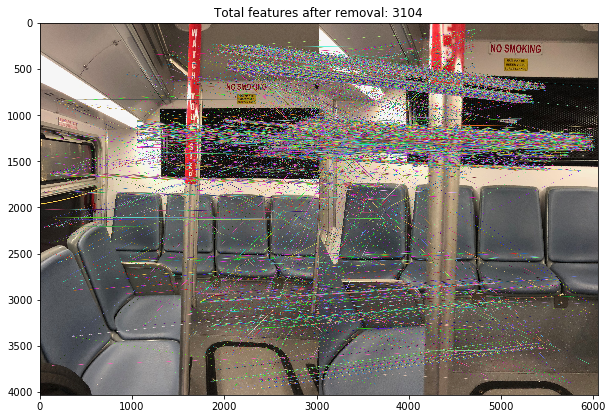

In [147]:
img4 = cv2.drawMatches(img1,kp1,img2,kp2,final_matches,None,flags=2)
plt.figure(figsize=(10,10))
plt.imshow(img4)
plt.title('Total features after removal: '+str(len(final_matches)))
plt.savefig('final_features_after_removal.jpg',dpi=200)
plt.show()